# Token

In [3]:
api_key = ''
#all housing price index follow each other closely

# Imports

In [291]:
%matplotlib inline
from bs4 import BeautifulSoup
import pandas as pd
import quandl
import urllib
import bleach
import pickle 
from ggplot import *


# Get Data

In [185]:

def get_table():
    state_abbrv = urllib.urlopen('https://simple.wikipedia.org/wiki/List_of_U.S._states').read()
    soup = BeautifulSoup(state_abbrv)
    state_table = soup.find("table", {"class" :"wikitable sortable"})
    return state_table


def get_abbrv():
    abbrv_list = []
    for row in get_table().find_all('b'):
        cleaned = bleach.clean(row,tags=[], strip = True)
        abbrv_list.append(cleaned)
    return abbrv_list

def get_hpi_data():
    hpi_frame = pd.DataFrame()
    for state_abbrv in get_abbrv():
        state_df = quandl.get("FMAC/HPI_" + state_abbrv, authtoken = api_key)
        state_df = state_df.rename(columns={'Value': str(state_abbrv)})
        #state_df[cleaned] = (state_df[cleaned] - state_df[cleaned][0]) / state_df[cleaned][0] * 100.0
    
        if hpi_frame.empty:
            hpi_frame = state_df
        else:
            hpi_frame = hpi_frame.join(state_df) 
    
    #hpi_frame.to_pickle('hpi_data_pc_change.pickle')
    hpi_frame.to_pickle('hpi_data.pickle')
    
def get_hpi_usa():
    usa_frame = quandl.get("FMAC/HPI_USA" , authtoken = api_key)
    usa_frame = usa_frame.rename(columns={'Value': 'USA'})
    return usa_frame
    
    
def convertDate(df):
    df['Date'] = df.index
    df.reset_index(drop=True)
    return df
    

# HPI Analysis 

In [186]:
get_hpi_data() #run this to pickle thehpi quandal data

In [292]:
hpi_data = pd.read_pickle('hpi_data.pickle')
hpi_data.head()


,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Date,,,,,,,,,,,,,,,,,,,,,
1975-01-31,35.324038,34.400087,28.886571,36.838213,15.665713,19.666460,24.530646,27.146975,30.903838,30.862154,...,37.861487,32.210851,32.659989,24.603939,26.556884,27.954539,17.480301,41.248346,28.142079,31.820164
1975-02-28,35.545343,34.911194,29.374322,37.149935,15.721510,19.894520,25.051659,27.185646,32.121077,30.583518,...,37.445064,32.246969,32.970745,24.947973,26.807912,28.230531,17.549796,42.277521,28.537453,32.277898
1975-03-31,35.803942,35.434316,29.828662,37.420977,15.912556,20.118681,25.443161,27.252283,33.931871,30.466267,...,37.021567,32.329769,33.542148,25.258222,27.050106,28.431856,17.657853,43.349320,28.927629,32.762841
1975-04-30,36.120498,35.980265,30.179479,37.642638,16.225479,20.327062,25.663172,27.389022,36.149709,30.532432,...,36.601128,32.457447,34.383316,25.504964,27.270090,28.580271,17.787585,44.454450,29.277377,33.266394
1975-05-31,36.421849,36.576786,30.371230,37.864617,16.486814,20.497741,25.733086,27.622613,36.433117,30.653270,...,36.220049,32.606660,34.652016,25.668351,27.463349,28.704849,17.904450,45.566959,29.562586,33.755117


In [315]:
def plot_hpi(hpi_data):
    hpi_converted = convertDate(hpi_data)
    data = pd.melt(hpi_converted, id_vars='Date').dropna()
    data = data.rename(columns = {'Date':'Date','variable':'States','value':'Price'})
    show = ggplot(data, aes('Date','Price',color='States')) + geom_line() + ggtitle("Percentage Change of US Housing Price Index From 1975 to 2016")
    return show

def plot_hpi_with_usa(usa_data):
    usa_con = convertDate(usa_data)
    usa_data = pd.melt(usa_con, id_vars='Date').dropna()
    usa_data = data.rename(columns = {'Date':'Date','variable':'States','value':'Price'})
  
    show = plot_hpi(pd.read_pickle('hpi_data_pc.pickle')) + \
        geom_line(usa_data, aes('Date','Price')) 
    
    return show

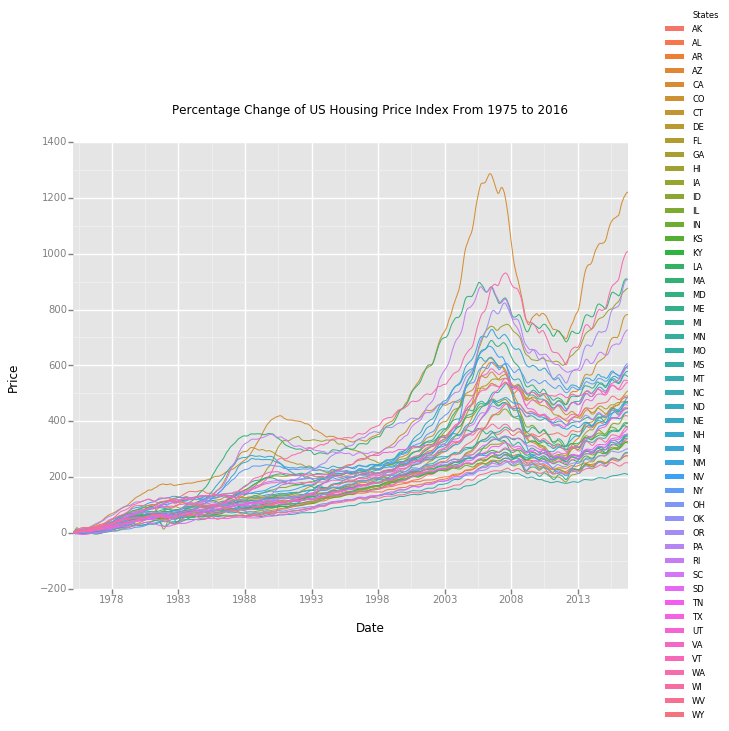

<ggplot: (341247377)>

In [316]:
plot_hpi(pd.read_pickle('hpi_data_pc.pickle'))

In [320]:
hpi_data_corr = hpi_data.corr()
min_data = hpi_data_corr.min()
min_series = {'Min' : pd.Series(min_data)}

min_frame = pd.DataFrame(min_series)
min_frame['State Abbrev'] = min_frame.index
min_frame = min_frame.reset_index(drop=True)
min_frame = min_frame[['State Abbrev','Min']]
min_frame

,State Abbrev,Min
0,AL,0.872598
1,AK,0.771111
2,AZ,0.846203
3,AR,0.861622
4,CA,0.870084
5,CO,0.838751
6,CT,0.823583
7,DE,0.864550
8,FL,0.832715
9,GA,0.849939


In [339]:
def show_histo():
    return ggplot(min_frame,aes(x = 'Min')) + geom_histogram(binwidth=.01, fill = 'salmon') +\
        ggtitle('Histogram of A States Correlated Minimum Value ') +\
        xlab('Amount') + ylab('Frequency')  


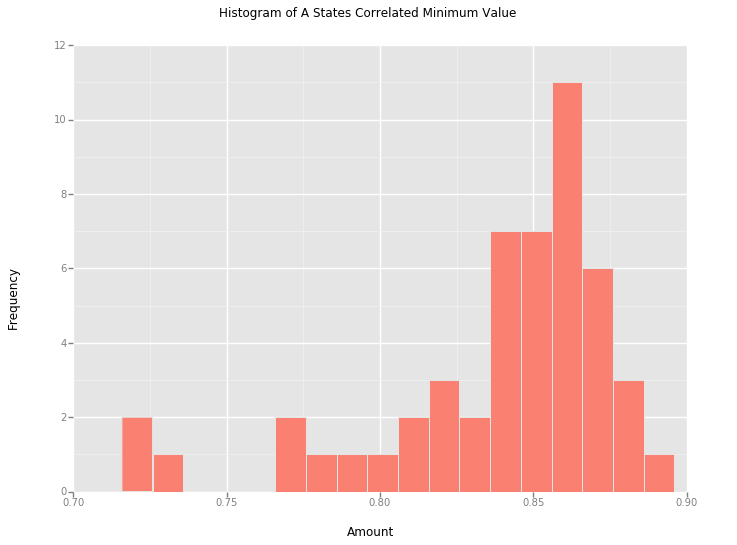

<ggplot: (345792625)>

In [340]:
show_histo()